In [1]:
import pandas as pd
ad = pd.read_csv("Advertising.csv")
ad.head()
#reklam harcamaları sonucu şu kadar satarım 

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
ad.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [3]:
au = pd.read_csv("Auto.csv")
au.head()

,mpg\tcylinders\tdisplacement\thorsepower weight\tacceleration\tyear\torigin\tname\t\t\t\t\t\t
0,18.0 8 307.0 130.0 3504. 12...
1,15.0 8 350.0 165.0 3693. 11...
2,18.0 8 318.0 150.0 3436. 11...
3,16.0 8 304.0 150.0 3433. 12...
4,17.0 8 302.0 140.0 3449. 10...


In [4]:
X = ad["TV"]
y = ad["Sales"]
X.head()


0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [5]:
au.corr() #yakıt harcama miktarına göre diğer değerlerin birbirine göre korelasyonu

""


In [6]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [7]:
ad.describe() #istatistiksel verileri alabiliriz

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
ad = ad.iloc[:,1:len(ad)] #ilk kolonu alma son kolona kadar git

In [9]:
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
import statsmodels.api as sm
X = sm.add_constant(X)
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [11]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [12]:
linearmodel =sm.regression.linear_model.OLS(y,X)
sonuc = linearmodel.fit()
sonuc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           1.47e-42
Time:                        16:05:38   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
pred = sonuc.predict([1,45])

In [14]:
pred

array([9.17174237])

In [15]:
0.0475*45 + 7.0326

9.170100000000001

In [23]:
from sklearn.linear_model import LinearRegression
X = ad[["TV"]]
reg = LinearRegression()
model = reg.fit(X,y)


In [24]:
model.coef_

array([0.04753664])

In [25]:
model.intercept_

7.032593549127693

In [26]:
model.score(X,y)

0.611875050850071

In [27]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [28]:
model.predict([[45]])

array([9.17174237])

In [29]:
ad.shape

(200, 4)

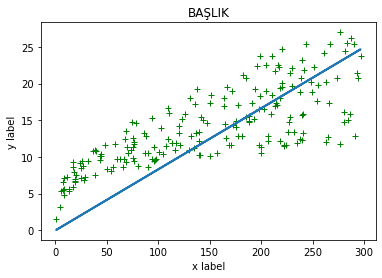

In [37]:
import matplotlib.pyplot as plt
plt.plot(X,y,'g+')
plt.plot(X, model.fittedvalues, lw=2 )
plt.title("BAŞLIK")
plt.xlabel("x label")
plt.ylabel("y label")
plt.show()

In [30]:
linearmodel = sm.regression.linear_model.OLS(y,X)
model = linearmodel.fit()

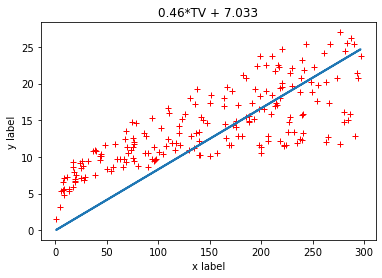

In [38]:
import matplotlib.pyplot as plt
plt.plot(X,y,'r+')
plt.plot(X, model.fittedvalues,'-', lw=2 )
plt.title("0.46*TV + 7.033")
plt.xlabel("x label")
plt.ylabel("y label")
plt.show()

In [34]:
predd = model.predict(X)

In [35]:
predd

0      19.155735
1       3.704608
2       1.431893
3      12.612316
4      15.051529
         ...    
195     3.180135
196     7.842113
197    14.735181
198    23.609589
199    19.322234
Length: 200, dtype: float64

In [39]:
#tools.plots(model, 'mpg', auto)

NameError: name 'tools' is not defined